## THE SPARK FOUNDATION- Data Science and Business Analytics Internship

## GRIPJAN21

### Author -- SHRUTI BANERJEE

### TASK-2 : PREDICTION USING UNSUPERVISED MACHINE LEARNING.

USING PYTHON AND JUPYTER NOTEBOOK

**OBJECTIVE**: The main aim is to predict the optimum number of clusters by using the k-means clustering method and represent it visually from the given Iris dataset.

#### THE STEPS TO BE FOLLOWED ARE

     STEP-1: IMPORTING THE DATA
     STEP-2: VISUALIZING THE DATA
     STEP-3: FINDING THE OPTIMUM NUMBER OF CLUSTERS
     STEP-4: APPLYING K MEANS CLUSTERING ON THE DATA
     STEP-5: VISUALIZING THE CLUSTERS

### STEP-1 : IMPORTING THE DATA

In this step we will be importing all the required libraries.

In [92]:
# Load the iris dataset

#Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
sns.set()
import os

iris_df=pd.read_csv(r"C:\Users\HP\Desktop\Iris.csv")
print("Data imported Successfully")

Data imported Successfully


In [93]:
# let us observe the DataSet

In [94]:
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [95]:
iris_df.tail(10)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
140,141,6.7,3.1,5.6,2.4,Iris-virginica
141,142,6.9,3.1,5.1,2.3,Iris-virginica
142,143,5.8,2.7,5.1,1.9,Iris-virginica
143,144,6.8,3.2,5.9,2.3,Iris-virginica
144,145,6.7,3.3,5.7,2.5,Iris-virginica
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


### STEP-2: VISUALIZING THE DATASET

In this step we will visualize our Data.

In [96]:
iris_df.shape

(150, 6)

In [97]:
iris_df.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [98]:
iris_df['Species'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [99]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB



The most important information obtained here is that there is no null values in the given Dataset

In [100]:
#STATISTICAL DETAILS
iris_df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [101]:
#LETS DROP THE LABEL COLUMN AS IT IS AN UNSUPERVISED LABEL PROBLEN
iris=pd.DataFrame(iris_df)
df=iris.drop(columns=['Species', 'Id'])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


### STEP-3 : FINDING THE OPTIMUM NUMBER OF CLUSTERS

Before clustering the data using kmeans, we need to specify the number of clusters in order to find the optimum number of clusters, there are various methods available like Solhouette Coefficient and the Elbow method. Here,the elbow method is used.

#### Brief about the Elbow method

In this method, the number of clusters are varies within a certain range. For each number , within cluster sum of square (wss) value is calculated and stored in a list. These values are then plotted against the range of number of clusters that are used before. The location of bend in the 2D plot indicates the appropriate number of clusters.

In [102]:
# Finding the optimum number of clusters for k-means classification

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    

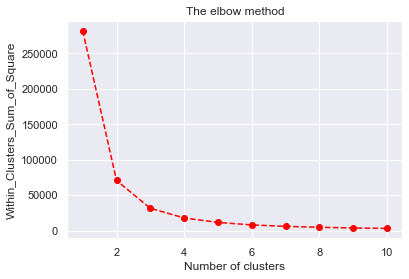

In [103]:
# Plotting the results onto a line graph, 
# `allowing us to observe 'The elbow'
plt.plot(range(1, 11), within_clusters_sum_of_square,'go--',color='red')
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('Within_Clusters_Sum_of_Square') 
plt.show()

#### The above plot is called the Elbow Method because the optimum clusters is where the elbow occurs.


#### Thus this is the point when the within cluster sum of squares(WCSS) doesn't decrease significantly with every iteration.

#### Therefore,we choose the number of clusters for this data set to be 3

## Step-4: Applying k means clustering on the data

#### K-means clustering is a method of vector quantization, originally from signal processing,that aims to partition n observations into k clusters in which each observation belongs to the cluster within the nearest mean (cluster centres or cluster centriod) serving as a prototype of the cluster.

In [104]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

## Step-5: Visualizing the clusters

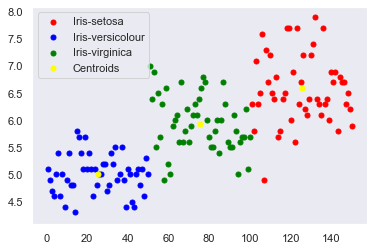

In [105]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1],  s = 25, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1],  s = 25, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],  s = 25, c = 'green', label = 'Iris-virginica')



# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],  s = 25, c = 'yellow', label = 'Centroids')
plt.legend()
plt.grid()
plt.show()

### FINAL CONCLUSION

THE IRIS DATA SET WAS FOUND TO BE DIVIDED INTO 3 CLUSTERS BY BOTH VISUALLY AND USING THE K-MEANS ALGORITHM.

### THANK YOU
